#Directory, Libraries and data

In [1]:
#Change directory
%cd /content/drive/MyDrive/Personal/Business Analyst course/Part 1 - Statistics and Descriptive Analytics/Intermediary

/content/drive/MyDrive/Personal/Business Analyst course/Part 1 - Statistics and Descriptive Analytics/Intermediary


In [5]:
#Libraries
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#get data
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Density Plots

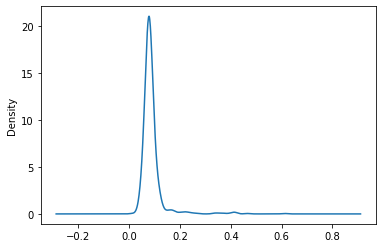

In [12]:
#Density distribution
df.chlorides.plot.density()

In [22]:
#count checking
df.loc[(df.chlorides <= df.chlorides.mean() + 1 * df.chlorides.std()) & 
       (df.chlorides >=  df.chlorides.mean() - 1 * df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.8048780487804879

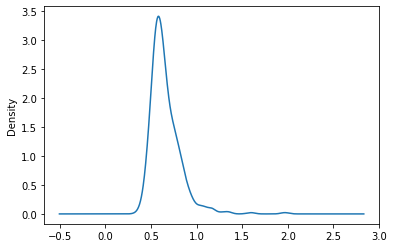

In [21]:
#plotting alcohol distribution
df.sulphates.plot.density()

In [25]:
#count checking
df.loc[(df.sulphates <= df.sulphates.mean() + 3 * df.sulphates.std()) & 
       (df.sulphates >=  df.sulphates.mean() - 3 * df.sulphates.std())].sulphates.count()/df.sulphates.count()

0.9831144465290806

#Shapiro-Wilks test

In [27]:
#Shapiro-Wilks test for chlorides
stat, p = st.shapiro(df.chlorides.dropna())
print(p)
if p > 0.05:
	print('Sample looks Gaussian/Normal (fail to reject H0)')
else:
	print('Sample does not look Gaussian/Normal (reject H0)')

0.0
Sample does not look Gaussian/Normal (reject H0)


In [28]:
#Shapiro-Wilks test for sulphates
stat, p = st.shapiro(df.sulphates.dropna())
print(p)
if p > 0.05:
	print('Sample looks Gaussian/Normal (fail to reject H0)')
else:
	print('Sample does not look Gaussian/Normal (reject H0)')

5.821617678881608e-38
Sample does not look Gaussian/Normal (reject H0)


#Standard Error

In [29]:
#Standard Errors of alcohol
st.sem(df.alcohol)

0.026650018979018173

In [30]:
#Us doing the computations
df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018118

In [31]:
#Standard Errors of alcohol
st.sem(df.pH)

0.0038608683325203784

In [32]:
#Us doing the computations
df.pH.std() / m.sqrt(df.pH.count())

0.0038608683325203753

#Confidence Interval

In [33]:
#Confidence Interval of the mean of Wins
st.norm.interval(0.95, loc = df[['citric acid']].mean(), scale = st.sem(df[['citric acid']]))

(array([0.26142755]), array([0.28052367]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac3094c990>]],
      dtype=object)

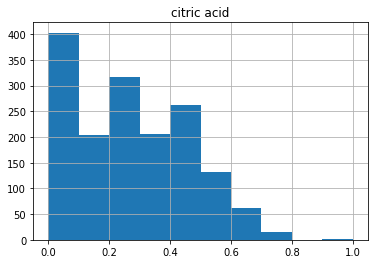

In [34]:
#histogram of citric acid
df[['citric acid']].hist()

In [38]:
#Confidence Interval of the mean of Density
st.norm.interval(0.95, 
                 loc = df.density.mean(), 
                 scale = st.sem(df.density))

(0.9966541725972513, 0.9968391857517154)

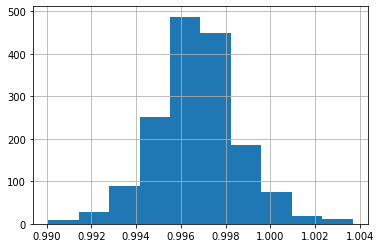

In [37]:
#histogram of density variable
df.density.hist()

#T-tests

In [6]:
#retrieve data
data = pd.read_csv("stackoverflow.csv")
data.head()

,Unnamed: 0,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,Desktop_applications_developer,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,1,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,United States,130000.000000,20,1,1,1000,Remote,9,0,0,0,0,1,1,0,0,0,0,1,0,1
2,3,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,Germany,64516.129032,4,0,0,1000,Not remote,9,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,India,6636.323594,1,0,1,5000,Not remote,5,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
#Salaries in UK versus Germany
#subseting
uk = data.loc[data.Country == 'United Kingdom'].Salary
de = data.loc[data.Country == 'Germany'].Salary

#t-test
stat, p = st.ttest_ind(uk, de)
print(p)
if p > 0.05:
	print('Both countries have similar salaries (fail to reject H0)')
else:
	print('There is a difference in salaries (reject H0)')

0.026389999561760986
There is a difference in salaries (reject H0)


In [8]:
#Diferrence in experience between India and United States
#subseting
us = data.loc[data.Country == 'United States'].YearsCodedJob
india = data.loc[data.Country == 'India'].YearsCodedJob

#t-test
stat, p = st.ttest_ind(uk, de)
print(p)
if p > 0.05:
	print('Both countries have similar experiences (fail to reject H0)')
else:
	print('There is a difference in experiences (reject H0)')

0.026389999561760986
There is a difference in experiences (reject H0)


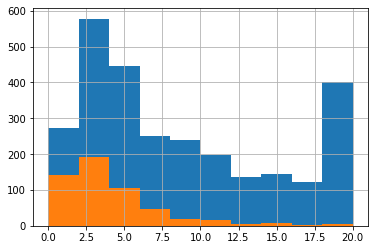

In [9]:
#histograms
us.hist()
india.hist()

#Chi-square test

In [12]:
#First we create a cross tab
tab = pd.crosstab(index = data.Country,
            columns = data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [16]:
#Then we execute the statistical test
chi2, p, dof, ex = st.chi2_contingency(tab, correction=False)
print(p)
if p > 0.05:
	print('There is no relationship (fail to reject H0)')
else:
	print('There is strong relationship (reject H0)')

3.321120877301216e-16
There is strong relationship (reject H0)


In [18]:
#Relationship between company size and hobbies
tab2 = pd.crosstab(index = data.Hobby,
                   columns = data.CompanySizeNumber)
tab2

CompanySizeNumber,1,10,20,100,500,1000,5000,10000
Hobby,,,,,,,,
0,101,123,293,245,91,180,60,243
1,311,400,961,918,309,436,192,731


In [19]:
#chi-square test
chi2, p, dof, ex = st.chi2_contingency(tab2, correction=False)
print(p)
if p > 0.05:
	print('There is no relationship (fail to reject H0)')
else:
	print('There is strong relationship (reject H0)')

0.025708455559671013
There is strong relationship (reject H0)
